DDA(데이터 정의 분석) 및 EDA(탐색적 데이터 분석)에 대한 연습문제
데이터셋: Titanic 데이터셋의 일부 (열: PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked)

In [199]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns
import pandas as pd 
data_df = pd.read_csv('../../datasets/TitanicFromDisaster_train.csv')
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


I. DDA(데이터 정의 분석) 연습문제
데이터 구조 및 열 정의
각 열의 데이터 유형을 파악하시오.
다음 질문에 답하시오:
Survived 열은 어떤 값을 나타내는가?
Pclass 열의 범주는 무엇을 의미하는가?

In [200]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [201]:
# Survived 는 생존 여부 를 나타내는 int형 데이터 
# Pclass 는 객실 등급을 나타내는 int형 데이터 

결측치 확인
데이터셋에서 결측치가 있는 열을 모두 나열하시오.
각 열의 결측치 개수를 계산하시오.

In [202]:
# 결측치 부터 확인 
data_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

기초 통계량 계산
수치형 열(Age, Fare)의 평균, 중앙값, 최댓값, 최솟값, 표준편차를 구하시오.
범주형 열(Sex, Embarked)의 고유값(unique values)과 각 값의 빈도를 구하시오.

In [203]:
data_df[['Age','Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [204]:
data_df[['Sex','Embarked']].describe(include='object')

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


II. EDA(탐색적 데이터 분석) 연습문제
생존 여부 분석
Survived 열의 값(0과 1)의 빈도를 막대 그래프로 시각화하시오.
생존자 비율을 계산하시오.


In [205]:
survival_ratio = data_df['Survived'].mean() * 100
survival_ratio

38.38383838383838

<Axes: xlabel='Survived', ylabel='count'>

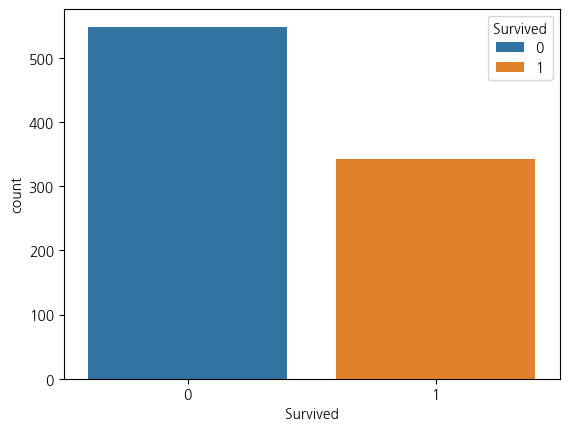

In [206]:
sns.countplot(data=data_df, 
            x='Survived', 
            hue='Survived')


성별에 따른 생존율 분석
성별(Sex)에 따라 생존자와 사망자의 분포를 막대 그래프로 나타내시오.
각 성별의 생존율(생존자 비율)을 계산하시오.

In [207]:
# 데이터 준비
counts_df = data_df.groupby(['Sex', 'Survived']).size().reset_index(name='count')
counts_df['Survived'] = counts_df['Survived'].map({0: 'Dead', 1: 'Survived'})

<Axes: xlabel='Sex', ylabel='count'>

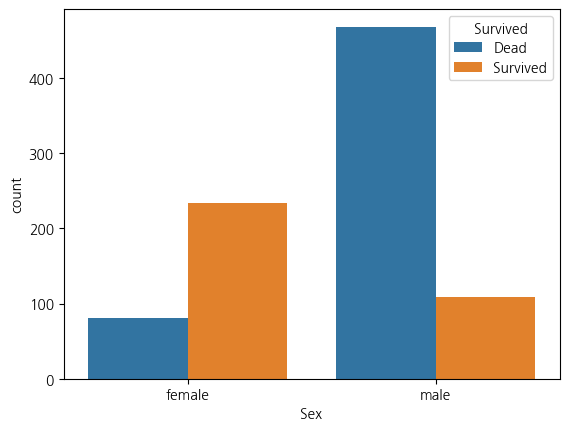

In [208]:
sns.barplot(data=counts_df, 
            x='Sex', 
            y='count',
            hue='Survived')

In [209]:
counts_df

,Sex,Survived,count
0,female,Dead,81
1,female,Survived,233
2,male,Dead,468
3,male,Survived,109


In [210]:
survival_rate = counts_df.pivot_table(
    values='count',
    index='Sex',
    columns='Survived',
    aggfunc='sum'
).assign(
    생존율=lambda x: x['Survived'] / (x['Dead'] + x['Survived']) * 100
)

survival_rate

Survived,Dead,Survived,생존율
Sex,,,
female,81,233,74.203822
male,468,109,18.890815


객실 등급(Pclass) 분석
객실 등급(Pclass)별 생존율을 계산하시오.
객실 등급에 따른 생존자 수와 사망자 수를 비교하는 스택형 막대 그래프를 작성하시오.

In [211]:
# 데이터 준비
counts_df = data_df.groupby(['Pclass', 'Survived']).size().reset_index(name='count')
counts_df['Survived'] = counts_df['Survived'].map({0: 'Dead', 1: 'Survived'})
counts_df

,Pclass,Survived,count
0,1,Dead,80
1,1,Survived,136
2,2,Dead,97
3,2,Survived,87
4,3,Dead,372
5,3,Survived,119


<Axes: xlabel='Pclass', ylabel='count'>

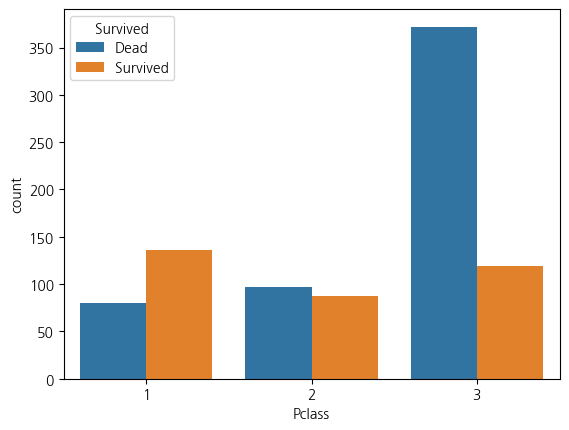

In [212]:
sns.barplot(data=counts_df, 
            x='Pclass', 
            y='count',
            hue='Survived')

In [213]:
counts_df

,Pclass,Survived,count
0,1,Dead,80
1,1,Survived,136
2,2,Dead,97
3,2,Survived,87
4,3,Dead,372
5,3,Survived,119


In [214]:
survival_rate = counts_df.pivot_table(
    values='count',
    index='Pclass',
    columns='Survived',
    aggfunc='sum'
).assign(
    생존율=lambda x: x['Survived'] / (x['Dead'] + x['Survived']) * 100
)

survival_rate

Survived,Dead,Survived,생존율
Pclass,,,
1,80,136,62.962963
2,97,87,47.282609
3,372,119,24.236253


요금(Fare) 분포
요금(Fare)의 분포를 히스토그램으로 나타내시오.
요금 분포에서 이상치를 확인하고 이상치가 무엇인지 설명하시오.

<Axes: xlabel='Fare', ylabel='Count'>

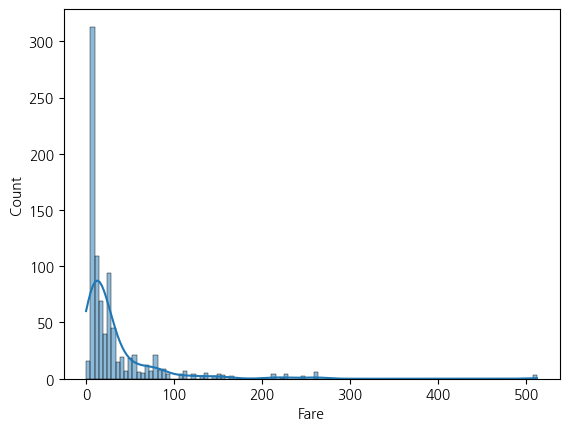

In [215]:
sns.histplot(data=data_df, x='Fare', kde=True)


<Axes: xlabel='Fare'>

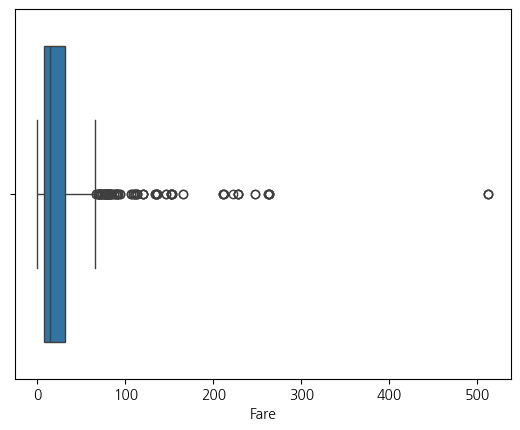

In [216]:
sns.boxplot(data=data_df, x='Fare')


In [217]:
# tail이 지나치게 길게 나오게 유도하는 중심에서 너무 먼 값을 의미 
# 이럴 경우 max bound를 찾아서 max bound 값으로 대체하는 것도 가능 


탑승 항구(Embarked) 분석
각 탑승 항구(Embarked)에서 탑승한 승객의 수를 파악하시오.
각 항구별 생존율을 계산하시오.

In [218]:
# 데이터 준비
counts_df = data_df.groupby(['Embarked', 'Survived']).size().reset_index(name='count')
counts_df['Survived'] = counts_df['Survived'].map({0: 'Dead', 1: 'Survived'})
counts_df

,Embarked,Survived,count
0,C,Dead,75
1,C,Survived,93
2,Q,Dead,47
3,Q,Survived,30
4,S,Dead,427
5,S,Survived,217


<Axes: xlabel='Embarked', ylabel='count'>

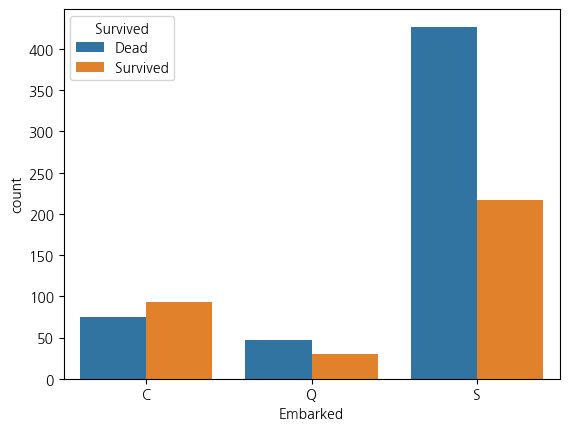

In [219]:
sns.barplot(data=counts_df, 
            x='Embarked', 
            y='count',
            hue='Survived')

In [220]:
counts_df


,Embarked,Survived,count
0,C,Dead,75
1,C,Survived,93
2,Q,Dead,47
3,Q,Survived,30
4,S,Dead,427
5,S,Survived,217


In [221]:
survival_rate = counts_df.pivot_table(
    values='count',
    index='Embarked',
    columns='Survived',
    aggfunc='sum'
).assign(
    생존율=lambda x: x['Survived'] / (x['Dead'] + x['Survived']) * 100
)

survival_rate

Survived,Dead,Survived,생존율
Embarked,,,
C,75,93,55.357143
Q,47,30,38.961039
S,427,217,33.695652



연령(Age) 분석
연령 분포를 밀도 차트로 나타내시오.
생존자와 사망자의 연령 분포를 비교하시오.

<Axes: xlabel='Age', ylabel='Density'>

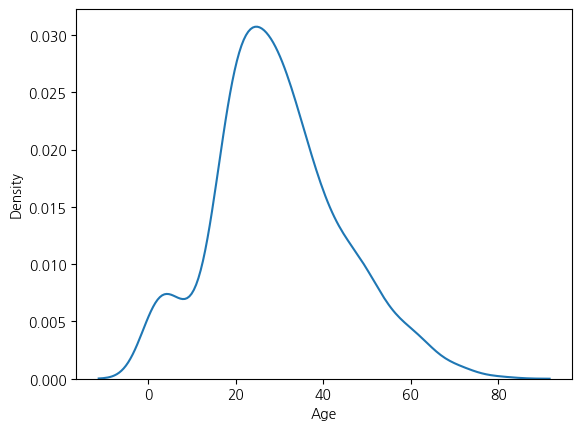

In [222]:
sns.kdeplot(data=data_df['Age'])

In [223]:
# 나이 구간 정의와 레이블 생성
bins = [0, 10, 20, 30, 40, 50, 60, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '60+']

# 나이 구간 생성
data_df['Age_Group'] = pd.cut(data_df['Age'], 
                             bins=bins,
                             labels=labels,
                             right=False)  # 구간 경계 포함 방식 설정

# 데이터 준비
counts_df = data_df.groupby(['Age_Group', 'Survived']).size().reset_index(name='count')
counts_df['Survived'] = counts_df['Survived'].map({0: 'Dead', 1: 'Survived'})
counts_df

/tmp/ipykernel_87583/1837626912.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_df = data_df.groupby(['Age_Group', 'Survived']).size().reset_index(name='count')


,Age_Group,Survived,count
0,0-10,Dead,24
1,0-10,Survived,38
2,11-20,Dead,61
3,11-20,Survived,41
4,21-30,Dead,143
5,21-30,Survived,77
6,31-40,Dead,94
7,31-40,Survived,73
8,41-50,Dead,55
9,41-50,Survived,34


<Axes: xlabel='Age_Group', ylabel='count'>

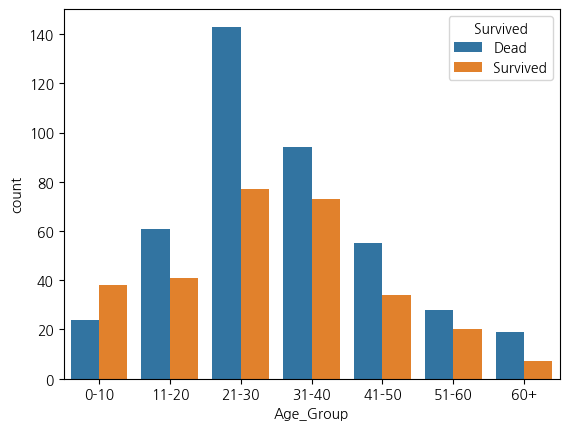

In [224]:
sns.barplot(data=counts_df, 
            x='Age_Group', 
            y='count',
            hue='Survived')

III. 심화 문제

가족 여부 분석
SibSp(형제/자매/배우자 수)와 Parch(부모/자녀 수)를 이용해 승객이 혼자인지 또는 가족과 함께인지 확인하는 새로운 열(IsAlone)을 추가하시오.
가족 여부(IsAlone)에 따른 생존율을 계산하고 시각화하시오.

In [225]:
import numpy as np
data_df['IsAlone'] = np.where((data_df['SibSp'] == 0) & (data_df['Parch'] == 0), 1, 0)
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21-30,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,31-40,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21-30,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,31-40,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,31-40,1


In [226]:
# 데이터 준비
counts_df = data_df.groupby(['IsAlone', 'Survived']).size().reset_index(name='count')
counts_df['IsAlone'] = counts_df['IsAlone'].map({0: 'NotAlone', 1: 'Alone'})
counts_df['Survived'] = counts_df['Survived'].map({0: 'Dead', 1: 'Survived'})
counts_df

,IsAlone,Survived,count
0,NotAlone,Dead,175
1,NotAlone,Survived,179
2,Alone,Dead,374
3,Alone,Survived,163


<Axes: xlabel='IsAlone', ylabel='count'>

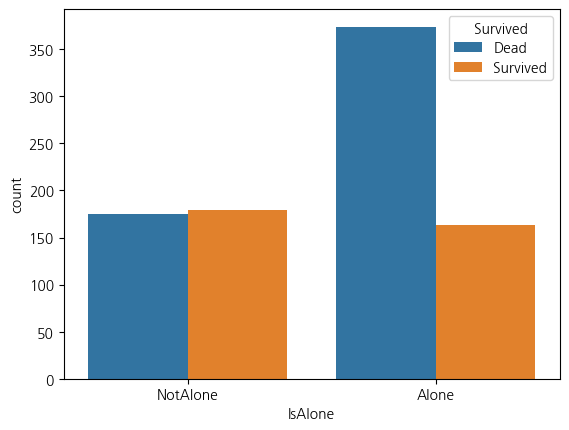

In [227]:
sns.barplot(data=counts_df, 
            x='IsAlone', 
            y='count',
            hue='Survived')

In [228]:
survival_rate = counts_df.pivot_table(
    values='count',
    index='IsAlone',
    columns='Survived',
    aggfunc='sum'
).assign(
    생존율=lambda x: x['Survived'] / (x['Dead'] + x['Survived']) * 100
)

survival_rate

Survived,Dead,Survived,생존율
IsAlone,,,
Alone,374,163,30.353818
NotAlone,175,179,50.564972


요인 간 상관관계 분석
생존 여부(Survived)와 객실 등급(Pclass), 성별(Sex), 연령(Age) 간의 상관관계를 파악하시오.
히트맵을 활용해 주요 요인 간의 상관관계를 시각화하시오.

In [229]:
data_df['Sex'] = data_df['Sex'].map({'male': 0, 'female': 1})

In [230]:
correlaiton_matrix = data_df[['Survived', 'Pclass', 'Sex', 'Age']].corr()
correlaiton_matrix

,Survived,Pclass,Sex,Age
Survived,1.000000,-0.338481,0.543351,-0.077221
Pclass,-0.338481,1.000000,-0.131900,-0.369226
Sex,0.543351,-0.131900,1.000000,-0.093254
Age,-0.077221,-0.369226,-0.093254,1.000000


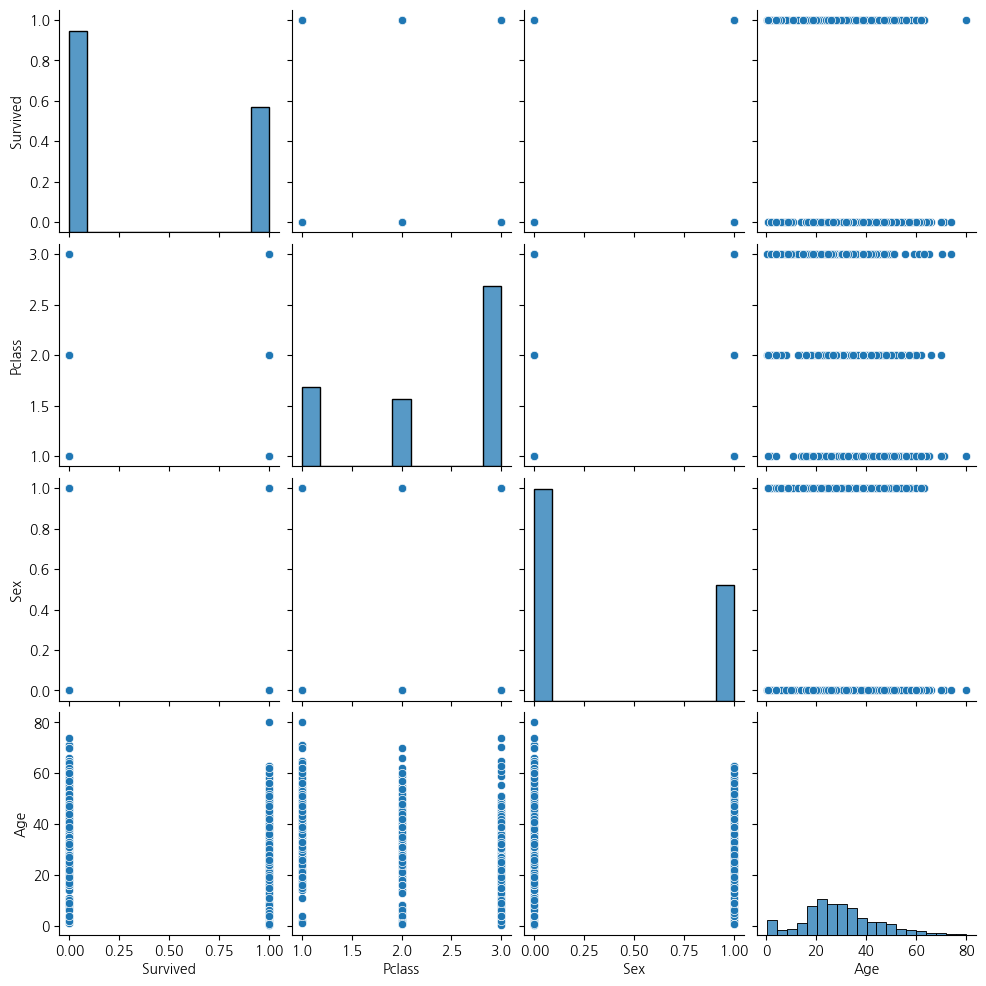

In [231]:

sns.pairplot(data=data_df[['Survived', 'Pclass', 'Sex', 'Age']]) # 수치로 보는게 더 나을 듯

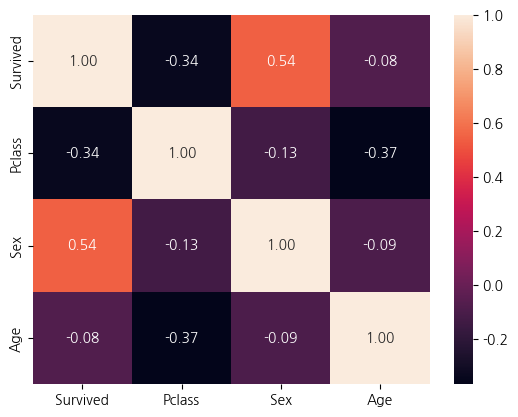

In [232]:
sns.heatmap(correlaiton_matrix, annot=True, fmt='.2f')
plt.show()